# Elman Network

The Elman network [[1]](#References) is formed by four different layers. The first three are the same as in the multilayer perceptron: the *input layer*, which receives the data or information process, the *hidden layers*, which compute intermediary calculations, and finally, the *output layer*, which produces the overall result. In addition, we have another layer, the *context layer*, which is in charge of reintroducing past hidden states into the network. The general architecture is represented as: 

<p align="center">
    <img width="400" height="300"src="../images/architecture.png">
</p>

The context layer adds recurrency to the network, allowing it to detect temporal dependencies between consecutive states. Training is straightforward using the *backpropagation algorithm*, provided the possible simplification of the architecture to:


<p align="center">
    <img width="400" height="300"src="../images/unrolling.png">
</p>

Where context units are added to the input layer. Dashed weights from the hidden layer to the context layer are not trained and are fixed to 1. In other words, we will use the previous states of the hidden units as context without any modification. Also, the context units are set to 0.5 in the first iteration.

We can assess the performance of the Elman network in different ways. In this notebook, we will replicate the Exclusive-OR study carried on in [[1]](#References).


## Exclusive-OR (XOR)

The XOR gate produces 1 whenever the inputs are different, 0 otherwise:

<p align="center">
    <img width="200" height="100"src="../images/xor_gate.png">
</p>


If we were to use a feedforward neural network to produce the XOR between two outputs, we would need to use at least one hidden layer. We can use an Elman Network to learn the XOR; however we have first to translate the problem into the temporal domain. To do so, we will concatenate the inputs and outputs, forming a vector as represented:

<p align="center">
    <img width="400" height="350"src="../images/gate_to_vec.png">
</p>

Where the vector corresponds to the concatenated version of the XOR gate depicted above. We will concatenate multiple XOR, in random order for training. The task of the network will be to predict the following state; thus we will use the same vector for testing, but displaced one position to the right:

<p align="center">
    <img width="380" height="300"src="../images/train_test.png">
</p>


In [1]:
# Add temporary path to code
import sys
sys.path.append("../recurrent_neural_networks/")

# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from utils import create_xor_data
from elman_network import ElmanNetwork

# Random seed (for reproducibility)
np.random.seed(4321)

We will use the function `create_xor_data` to create the unidimensional XOR input. The argument corresponds to the number of permutations of the XOR, having 12 bits each. In [[1]](#References), 3000 bits are used for training, therefore we will use 250 permutations, $250 \times 12 = 3000$.

In [2]:
X_train, y_train  = create_xor_data(250)

print("X_train: [", *X_train[:12], "...", *X_train[-12:], "]")
print("y_train: [", *y_train[:12], "...", *y_train[-12:], "]")

X_train: [ 1 1 0 1 0 1 0 1 1 0 0 0 ... 0 0 0 1 0 1 1 1 0 0 1 1 ]
y_train: [ 1 0 1 0 1 0 1 1 0 0 0 0 ... 0 0 1 0 1 1 1 0 0 1 1 1 ]


In [3]:
# Initialize the network
net = ElmanNetwork(num_inputs=1, num_hidden=2, num_context=2, num_outputs=1)

print(net)

ElmanNetwork(Inputs=1, Hidden=2, Contextual=2, Outputs=1)


Next, we train the network during 600 passes (or epochs).

In [4]:
# Training
net.train(inputs=X_train, outputs=y_train, learning_rate=0.01, passes=600)

100%|██████████| 600/600 [03:46<00:00,  2.65it/s]


Finally, we will test the network. To do so, we create new data of 12 bits and calculate the squared error, averaging 1200 cycles. Then we plot the error for each bit position.

In [5]:
#Testing
num_cycles = 1200
period = 12
cycles = np.zeros((num_cycles, period))
for cycle in tqdm(range(num_cycles)):
    X_test, y_test = create_xor_data(1)
    cycles[cycle, :] = net.predict(X_test, y_test)

100%|██████████| 1200/1200 [00:00<00:00, 1209.77it/s]


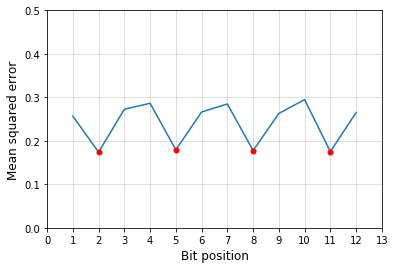

In [6]:
mean_cycles = np.mean(cycles, axis=0)
plt.plot(range(1, 13), mean_cycles)
plt.plot([2, 5, 8, 11], mean_cycles[[1, 4, 7, 10]], 'r.', markersize=10)
plt.xlabel('Bit position', fontsize=12)
plt.ylabel('Mean squared error', fontsize=12)
plt.xlim([0, 13])
plt.xticks(range(0,14))
plt.ylim([0, 0.5])
plt.grid(alpha=0.5)
plt.show()

We have highlighted bits 2, 5, 8, and 11, as they compute the XOR output. Here, the squared errors are smaller in comparison with the rest of the bit positions. When the network receives the first input, let's say 0, its prediction will be random since the next bit can be either 0 or 1. However, after the second input, if the network has learned the XOR, there can be only one result. For example, if the second input is 1, having already 0 and 1, we know that the next will be 1. The same will happen for the following inputs.

## References


1. [Finding Structure in Time](https://crl.ucsd.edu/~elman/Papers/fsit.pdf)